In [4]:
import magic
import scprep
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
data = scprep.io.load_csv('input.csv')
data.head()

,1,2,3,4,5,6,7,8,9,10,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
target_id,,,,,,,,,,,,,,,,,,,,,
TSPAN6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0
TNMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DPM1,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0,1.0
SCYL3,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1orf112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


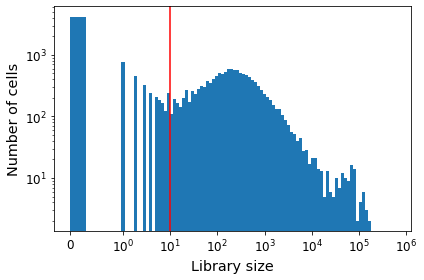

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

In [9]:
scprep.plot.plot_library_size(data, cutoff=10)

In [10]:
data = scprep.filter.filter_library_size(data, cutoff=10)

In [11]:
data = scprep.filter.filter_rare_genes(data, min_cells=10)

In [12]:
data = scprep.normalize.library_size_normalize(data)
data = scprep.transform.sqrt(data)

In [14]:
magic_op = magic.MAGIC()

In [16]:
data_magic = magic_op.fit_transform(data.transpose())

Calculating MAGIC...
  Running MAGIC on 2000 cells and 13109 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.28 seconds.
    Calculating affinities...
    Calculated affinities in 0.28 seconds.
  Calculated graph and diffusion operator in 1.77 seconds.
  Running MAGIC with `solver='exact'` on 13109-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.71 seconds.
Calculated MAGIC in 2.58 seconds.


In [20]:
data_magic.transpose().to_csv('input2.csv')